# BASICS OF PYTHON | SESSION 5

---
Sina Shafiezadeh | April 2023
---


Please follow the next steps over the next 3 hours in order to complete your exam successfully:


1. Download **Spotify Song Attributes** dataset from [HERE](https://www.kaggle.com/datasets/geomack/spotifyclassification).
2. Import dataset in **Google Colab**.
3. Overview dataset and define **one reasonable question**. An important point is to select a question that you will be able to implement statistical tests and plotting.
4. **Preprocess** the dataset to start your analysis.
5. Implement the **statistical models**.
6. **Plot** your results.
7. Set up your **GitHub** account. You can get help from this [LINK](https://docs.aws.amazon.com/codedeploy/latest/userguide/tutorials-github-create-github-account.html).
8. Upload your code and results in a **repository**.
9. Modify the repository title and description then **publish it**.
10. **Send your public repository** to me by email (sina.shafiezadeh@studenti.unipd.it).


# 1.&nbsp;Data Importing

In [9]:
# import packages
import pandas as pd
import numpy as np

In [18]:
data = pd.read_csv('data.csv')
data

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


# 2.&nbsp;Data Cleaning (overview)

In [19]:
# getting general info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [23]:
# the main descriptive statistics about the data
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,4.187205,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,1.393691,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,0.272714,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,3.400255,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,3.897437,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,4.595661,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,17.078659,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [32]:
data.isna().sum()
# no NaN values. Good!

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [33]:
print(data['target'].value_counts())

1    1020
0     997
Name: target, dtype: int64


In [44]:
data.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

## Is the difference in lenght of the song between target 0 and 1 statically significant?

# 3.&nbsp;Data Cleaning (interpretability)

In [21]:
# changing the duration from ms to minutes
data['duration_ms'] = data['duration_ms']*1.7*(10**-5)

In [30]:
data['duration_ms'] = round(data['duration_ms'], 3)

In [31]:
data['duration_ms']

0       3.48
1       5.56
2       3.16
3       3.39
4       6.68
        ... 
2012    4.66
2013    3.10
2014    3.52
2015    3.16
2016    3.48
Name: duration_ms, Length: 2017, dtype: float64

In [43]:
# changing the name of the column in 'duration'
data.rename(columns = {'duration_ms':'duration'}, inplace = True)

# 4.&nbsp;Data Cleaning (reduction)

In [47]:
# Since I am only focusing on duration and targer, I will drop all the other colums 
data_reduced = data[['duration', 'target',]]
data_reduced

,duration,target
0,3.48,1
1,5.56,1
2,3.16,1
3,3.39,1
4,6.68,1
...,...,...
2012,4.66,0
2013,3.10,0
2014,3.52,0
2015,3.16,0


# 5.&nbsp;Data Cleaning (noisy data)

In [58]:
# I only want to consider songs that are longer than 1 minute and shorter than 7 minutes 
data_reduced = data_reduced[(data_reduced["duration"] > 1) & (data_reduced["duration"] < 7)]

In [59]:
data_reduced
# Confirm that there was a reduction in dimensionality

,duration,target
0,3.48,1
1,5.56,1
2,3.16,1
3,3.39,1
4,6.68,1
...,...,...
2012,4.66,0
2013,3.10,0
2014,3.52,0
2015,3.16,0


# 6.&nbsp;Data Exploring


In [61]:
# Let's see the differences in the mean values of song durations for thw two targets
data_reduced.groupby(["target"]).mean()

,duration
target,
0,3.884532
1,4.113323


# 7.&nbsp;Data Analysis

In [87]:
import scipy.stats as stats
from scipy.stats import t
import matplotlib.pyplot as plt

In [136]:
# variance of both data group
group_a = data_reduced[data_reduced['target']==False]["duration"]
group_b = data_reduced[data_reduced['target']==True]["duration"]

# t test
print(np.var(group_a), np.var(group_b))
def get_ttest(x,y):
  result = stats.ttest_ind(group_a, group_b, equal_var=True)
  return result

get_ttest(group_a, group_b)

0.6332276590238601 1.0933087076581403


Ttest_indResult(statistic=-5.41195243230165, pvalue=7.011827094785122e-08)

# 8.&nbsp;Data Visualization

In [134]:
import matplotlib.pyplot as mpt
data_plot = data_reduced.groupby(['duration']).mean()['target']
print(data_plot)

duration
1.13    0.0
1.40    0.0
1.41    1.0
1.49    0.0
1.59    1.0
       ... 
6.89    1.0
6.90    1.0
6.91    0.0
6.95    0.0
6.99    1.0
Name: target, Length: 423, dtype: float64


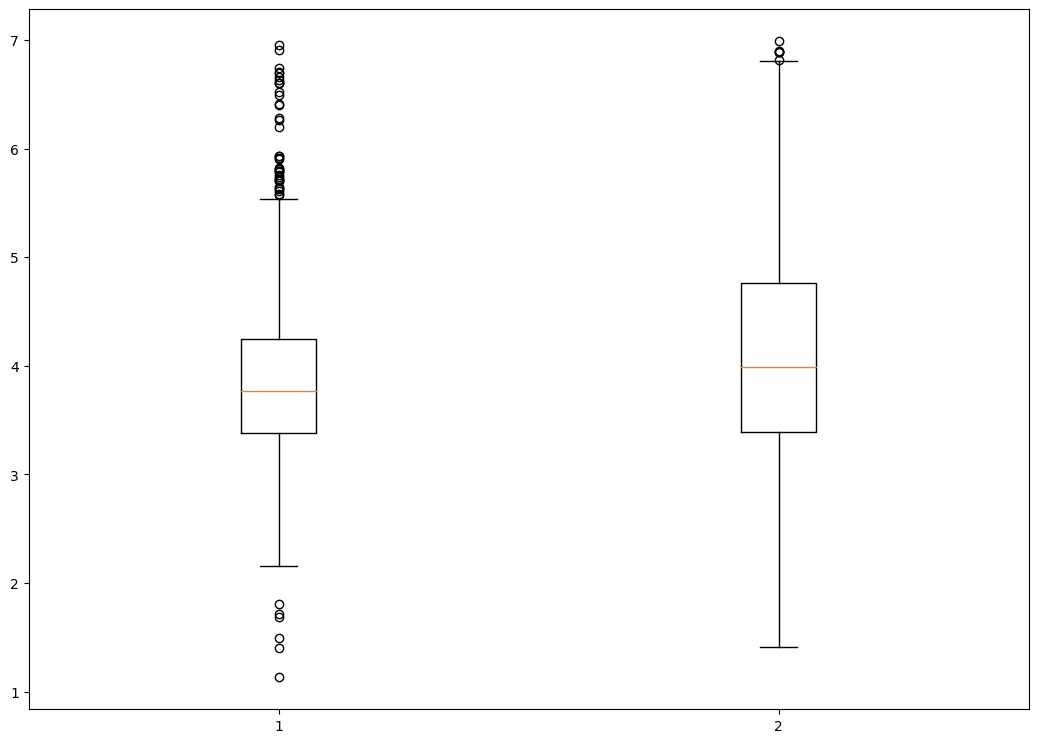

In [137]:
target0_dur = data_reduced[data_reduced['target']==False]["duration"].to_numpy()
target1_dur = data_reduced[data_reduced['target']==True]["duration"].to_numpy()

boxplot_data = [target0_dur, target1_dur]

fig = mpt.figure(figsize = (10,7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(boxplot_data)

# 9.&nbsp;Data Exporting

In [129]:
data_reduced.to_csv('Reduced_data.csv', header=True, index=True)